<a href="https://colab.research.google.com/github/mindyng/Projects/blob/master/NLP_Profiler_for_Misinterpreted_Sentences_aka_Edge_Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All code except tweets and classification analysis from [neomatrix369](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/presentations/awesome-ai-ml-dl/02-abhishektalks-2020/Backend_developer_to_Machine_Learning_Engineer.pdf). <-- Thank you!!

In [16]:
!pip install -U emoji

Requirement already up-to-date: emoji in /usr/local/lib/python3.6/dist-packages (0.5.4)


In [17]:
!pip install -U nltk

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.5)


In [18]:
!pip install -U textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)


In [19]:
%%time
%%bash

if [[ -e ../../library/org/neomatrix369 ]]; then
  echo "Library source found"
  
  cd ../../build
else
  if [[ -e awesome-ai-ml-dl/examples/better-nlp/library ]]; then
     echo "Library source found"
  else
     git clone "https://github.com/neomatrix369/awesome-ai-ml-dl" || true
  fi

  echo "Library source exists"
  cd awesome-ai-ml-dl/examples/better-nlp/
fi
pwd

Library source found
Library source exists
/content/awesome-ai-ml-dl/examples/better-nlp
CPU times: user 676 µs, sys: 8.87 ms, total: 9.54 ms
Wall time: 16.2 ms


In [20]:
import sys
import os
import pandas as pd

sys.path.insert(0, '../../library') # we need this when running inside the Docker container
sys.path.insert(0, './awesome-ai-ml-dl/examples/better-nlp/library') # we need this when running in Google Colab like environments

from org.neomatrix369.nlp_profiler import apply_text_profiling

Various text messages with different content.

In [21]:
# text_with_emojis = "🇧🇷 Brazilian hospital system Prevent Senior tackles COVID with the Raoult HCQ+AZI protocol with resounding success 😁"
# text_with_a_number = "BREAKING:  Treatment with Hydroxychloroquine Cut Death Rate Significantly  in COVID-19 Patients, Henry Ford Health System Study Shows."
# text_with_two_numbers = "A new retrospective study (n=360,000) shows that use of hydroxychloroquine reduces the chance of getting Covid-19 by about 50%."
# text_with_punctuations = "Ivermectin Study shows 100% of 60 Patients Better in an Average of Just Under 6 Days. HCQ+AZ also shown effective..."
# text_with_a_date = "06/30/20-In Brazil, rather than shut down the economy, they made hydroxychloroquine available for early treatment. The media predicted DOOM. It did not happen and it is not going to happen. This is a flat curve."
# text_with_dates = "Tweeted on 06/15/20 and retweeted on 06/26/20: Published studies & case-controlled trials show #Hydroxychloroquine has strong efficacy in early #COVID19. We have ability to save lives. It’s time for Canadians to DEMAND @JustinTrudeau @fordnation govts release 7M+ doses of stockpiled #HCQ & allow MDs to do our job without fear twitter.com/OnCall4ON/stat…."
# text_with_duplicates = "NEW Research—No evidence of benefit for #chloroquine and #hydroxychloroquine in #COVID19 patients, urgent randomised trials are needed: finding from a large observational study of nearly 15,000 patients with #COVID19 & 81,000 controls"

In [22]:
#Edge cases...:D
text1 = "The Pope/'s baby steps on gays."
text2 = "Boy paralyzed after tumor fights back to gain black belt."
text3 = "Scientists study whales from space."
text4= "Juvenille court to Try Shooting Defendant."

In [23]:
# data = [text_with_emojis, text_with_a_number, text_with_two_numbers, 
        # text_with_punctuations, text_with_a_date, text_with_dates, text_with_duplicates]
data = [text1, text2, text3, text4]
text_dataframe = pd.DataFrame(data, columns=['text'])
text_dataframe

,text
0,The Pope/'s baby steps on gays.
1,Boy paralyzed after tumor fights back to gain ...
2,Scientists study whales from space.
3,Juvenille court to Try Shooting Defendant.


Pandas' familiar describe() function.

In [24]:
%%time
text_dataframe.describe()

CPU times: user 5.68 ms, sys: 950 µs, total: 6.63 ms
Wall time: 6.47 ms


,text
count,4
unique,4
top,Juvenille court to Try Shooting Defendant.
freq,1


The usual output for describe() are descriptive stat's: count, unique, top, freq, mean, std dev.

Here we do something similar with text with NLP profiler.

In [25]:
%%time

profiled_text_dataframe = apply_text_profiling(text_dataframe, 'text')

CPU times: user 444 ms, sys: 5.51 ms, total: 450 ms
Wall time: 462 ms


In [26]:
profiled_text_dataframe

,text,sentiment_polarity_score,sentiment_polarity,sentiment_subjectivity_score,sentiment_subjectivity,spellcheck_score,spelling_quality,sentences_count,characters_count,spaces_count,words_count,duplicates_count,chars_excl_spaces_count,emoji_count,whole_numbers_count,alpha_numeric_count,non_alpha_numeric_count,punctuations_count,stop_words_count,dates_count
0,The Pope/'s baby steps on gays.,0.000000,Neutral,0.000000,Very objective,0.792989,Pretty good,2,31,5,7,0,26,0,0,23,8,3,1,0
1,Boy paralyzed after tumor fights back to gain ...,-0.083333,Negative,0.216667,Pretty objective,0.966633,Quite good,2,57,9,10,0,48,0,0,47,10,1,2,0
2,Scientists study whales from space.,0.000000,Neutral,0.000000,Very objective,0.958333,Quite good,2,35,4,5,0,31,0,0,30,5,1,1,0
3,Juvenille court to Try Shooting Defendant.,0.000000,Neutral,0.000000,Very objective,0.912959,Quite good,2,42,5,6,0,37,0,0,36,6,1,1,0


This is pretty cool! With intentional cryptic sentences that could be interpreted in multiple ways, see that backend did a good job with 3/4! Second sentence had negative sentiment polarity when should have been positive. Though in general, sentiment polarity and sentiment subjectivity did pretty good classification despite meaning ambiguity. 

Sentiment Analysis

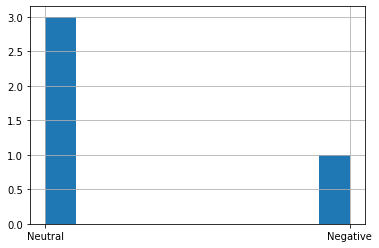

In [27]:
profiled_text_dataframe['sentiment_polarity'].hist()

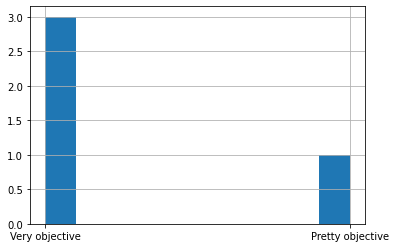

In [28]:
profiled_text_dataframe['sentiment_subjectivity'].hist()

Spelling quality check.

The spelling score and spelling quality check is upto 70% accurate, it's using Peter Norvig’s “How to Write a Spelling Corrector".

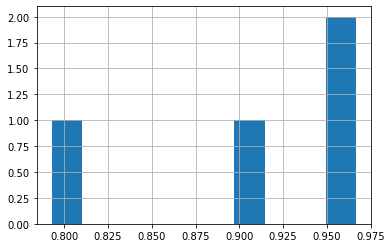

In [29]:
profiled_text_dataframe['spellcheck_score'].hist()

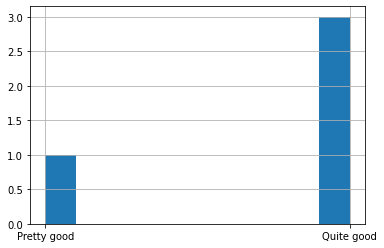

In [30]:
profiled_text_dataframe['spelling_quality'].hist()


Resources:

https://www.kaggle.com/raenish/cheatsheet-text-helper-functions
https://textblob.readthedocs.io/en/dev/quickstart.html